In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from time import time

from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
df = pd.read_csv('../data/data2.csv')
df.info()

2022-09-12 15:03:03.752874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2112 non-null   int64  
 1   Substrate  2112 non-null   object 
 2   Ceramic    2112 non-null   object 
 3   Thickness  2112 non-null   float64
 4   Lsub       2112 non-null   float64
 5   asub       2112 non-null   float64
 6   bsub       2112 non-null   float64
 7   Lcer       2112 non-null   float64
 8   acer       2112 non-null   float64
 9   bcer       2112 non-null   float64
 10  L          2112 non-null   float64
 11  a          2112 non-null   float64
 12  b          2112 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 214.6+ KB


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time

from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score


df = pd.read_csv('../data/data2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2112 non-null   int64  
 1   Substrate  2112 non-null   object 
 2   Ceramic    2112 non-null   object 
 3   Thickness  2112 non-null   float64
 4   Lsub       2112 non-null   float64
 5   asub       2112 non-null   float64
 6   bsub       2112 non-null   float64
 7   Lcer       2112 non-null   float64
 8   acer       2112 non-null   float64
 9   bcer       2112 non-null   float64
 10  L          2112 non-null   float64
 11  a          2112 non-null   float64
 12  b          2112 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 214.6+ KB


In [4]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [5]:
all_regs

[ARDRegression(),
 AdaBoostRegressor(),
 BaggingRegressor(),
 BayesianRidge(),
 CCA(),
 DecisionTreeRegressor(),
 DummyRegressor(),
 ElasticNet(),
 ElasticNetCV(),
 ExtraTreeRegressor(),
 ExtraTreesRegressor(),
 GammaRegressor(),
 GaussianProcessRegressor(),
 GradientBoostingRegressor(),
 HistGradientBoostingRegressor(),
 HuberRegressor(),
 IsotonicRegression(),
 KNeighborsRegressor(),
 KernelRidge(),
 Lars(),
 LarsCV(),
 Lasso(),
 LassoCV(),
 LassoLars(),
 LassoLarsCV(),
 LassoLarsIC(),
 LinearRegression(),
 LinearSVR(),
 MLPRegressor(),
 MultiTaskElasticNet(),
 MultiTaskElasticNetCV(),
 MultiTaskLasso(),
 MultiTaskLassoCV(),
 NuSVR(),
 OrthogonalMatchingPursuit(),
 OrthogonalMatchingPursuitCV(),
 PLSCanonical(),
 PLSRegression(),
 PassiveAggressiveRegressor(),
 PoissonRegressor(),
 QuantileRegressor(),
 RANSACRegressor(),
 RadiusNeighborsRegressor(),
 RandomForestRegressor(),
 Ridge(),
 RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
 SGDRegressor(),
 SVR(),
 TheilSenRegressor(max_subpopu

In [6]:
all_regs_drop = pd.Series(all_regs)
all_regs_drop = all_regs_drop.drop(index = [16, 29, 30, 31, 32])
all_regs_drop

0                                ARDRegression()
1                            AdaBoostRegressor()
2                             BaggingRegressor()
3                                BayesianRidge()
4                                          CCA()
5                        DecisionTreeRegressor()
6                               DummyRegressor()
7                                   ElasticNet()
8                                 ElasticNetCV()
9                           ExtraTreeRegressor()
10                         ExtraTreesRegressor()
11                              GammaRegressor()
12                    GaussianProcessRegressor()
13                   GradientBoostingRegressor()
14               HistGradientBoostingRegressor()
15                              HuberRegressor()
17                         KNeighborsRegressor()
18                                 KernelRidge()
19                                        Lars()
20                                      LarsCV()
21                  

In [7]:
###Predict L
X, y = df[['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']], df['L']

#Perform Scaling if needed
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Defining Regressors

regressors = all_regs_drop

#Testing Models
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", np.round(explained_variance_score(y_test, y_pred), decimals=3))
    print("\tMean absolute error:", np.round(mean_absolute_error(y_test, y_pred), decimals =3))
    print("\tR2 score:", np.round(r2_score(y_test, y_pred), decimals = 3))
    print()

ARDRegression()
	Training time: 0.030s
	Prediction time: 0.002s
	Explained variance: 0.891
	Mean absolute error: 3.27
	R2 score: 0.891

AdaBoostRegressor()
	Training time: 0.097s
	Prediction time: 0.005s
	Explained variance: 0.977
	Mean absolute error: 1.922
	R2 score: 0.977

BaggingRegressor()
	Training time: 0.024s
	Prediction time: 0.002s
	Explained variance: 0.998
	Mean absolute error: 0.4
	R2 score: 0.998

BayesianRidge()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.891
	Mean absolute error: 3.273
	R2 score: 0.891

CCA()
	Training time: 0.006s
	Prediction time: 0.002s
	Explained variance: 0.76
	Mean absolute error: 5.29
	R2 score: 0.76

DecisionTreeRegressor()
	Training time: 0.003s
	Prediction time: 0.001s
	Explained variance: 0.999
	Mean absolute error: 0.358
	R2 score: 0.999

DummyRegressor()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained variance: 0.0
	Mean absolute error: 11.316
	R2 score: -0.002

ElasticNet()
	Training time: 0.004s
	Pred

In [8]:
df_temp = pd.DataFrame({'Model': [],
        'Train Time': [],
        'Prediction time' : [],
        'Explained variance':[], 
        'Mean absolute error':[],
        'R2 score':[]})

for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    
    new_row = pd.DataFrame({'Model': str(model),
                            'Train Time': train_time,
                            'Prediction time' : predict_time,
                            'Explained variance': explained_variance_score(y_test, y_pred),
                            'Mean absolute error': mean_absolute_error(y_test, y_pred),
                            'R2 score':r2_score(y_test, y_pred)}, index = [0])
    
    df_temp = pd.concat((df_temp, new_row))
    df_models = np.round(pd.DataFrame(df_temp), decimals = 3)

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_models.sort_values(['Mean absolute error','R2 score', 'Train Time']).head(10)

,Model,Train Time,Prediction time,Explained variance,Mean absolute error,R2 score
0,DecisionTreeRegressor(),0.003,0.002,0.999,0.358,0.999
0,ExtraTreesRegressor(),0.216,0.021,0.999,0.360,0.999
0,ExtraTreeRegressor(),0.003,0.002,0.999,0.361,0.999
0,BaggingRegressor(),0.037,0.004,0.999,0.388,0.999
0,RandomForestRegressor(),0.162,0.012,0.999,0.398,0.999
0,GaussianProcessRegressor(),0.861,0.056,0.995,0.445,0.995
0,KNeighborsRegressor(),0.003,0.005,0.998,0.492,0.998
0,HistGradientBoostingRegressor(),82.447,0.019,0.997,0.531,0.997
0,GradientBoostingRegressor(),0.078,0.002,0.997,0.576,0.997
0,AdaBoostRegressor(),0.149,0.010,0.976,1.954,0.976


In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9988977118472835
model score on testing data: 0.9987523049993058


In [11]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

num_of_features = []
pipe = model

for i in range (1, 3):
    sfs = SFS(pipe,
         n_features_to_select= i,
         direction='forward',
         scoring='r2',
         n_jobs=3,
         cv=5)
    sfs.fit(X_train, y_train)
    features = sfs.get_support(indices=True)
    X.iloc[:, features]
    
    r2_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="r2", cv=5)
    mean_r2_train = np.mean(r2_train)
    
    r2_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="r2", cv=5)
    mean_r2_test = np.mean(r2_test)
    
    mse_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_squared_error", cv=5)
    mean_mse_train = np.mean(mse_train)
    
    mse_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_squared_error", cv=5)
    mean_mse_test = np.mean(mse_test)
    
    mae_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_train = np.mean(mae_train)
    
    mae_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_test = np.mean(mae_test)
    
    d = {'n_features': i, 'R2_train': mean_r2_train, 'R2_test': mean_r2_test, 'MSE_train': mean_mse_train, 
         'MSE_test': mean_mse_test, 'MAE_train': mean_mae_train, 'MAE_test': mean_mae_test} 
    num_of_features.append(d)

In [12]:
n_features_data = pd.DataFrame(num_of_features)
n_features_data

,n_features,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
0,1,0.918,0.907,-19.094,-20.943,-3.120,-3.202
1,2,0.982,0.980,-4.118,-4.446,-1.592,-1.681


In [13]:
from time import time

dt = DecisionTreeRegressor()
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': list(range(1,30)),
    'min_samples_leaf': list(range(1,100)),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "neg_mean_squared_error")

In [14]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 11484 candidates, totalling 114840 fits
CPU times: user 47.7 s, sys: 2.11 s, total: 49.8 s
Wall time: 1min 39s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='neg_mean_squared_error', verbose=1)

In [15]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
9414,0.002,0.001,0.001,0.000,poisson,9,10,"{'criterion': 'poisson', 'max_depth': 9, 'min_...",-0.231,-0.247,...,-0.319,-0.308,-0.325,-0.281,-0.253,-0.299,-0.216,-0.279,0.037,1
1597,0.003,0.000,0.002,0.000,squared_error,17,14,"{'criterion': 'squared_error', 'max_depth': 17...",-0.231,-0.247,...,-0.319,-0.308,-0.325,-0.281,-0.253,-0.299,-0.216,-0.279,0.037,2
10791,0.003,0.000,0.002,0.000,poisson,23,1,"{'criterion': 'poisson', 'max_depth': 23, 'min...",-0.231,-0.247,...,-0.319,-0.308,-0.325,-0.281,-0.253,-0.299,-0.216,-0.279,0.037,3
11389,0.003,0.001,0.002,0.000,poisson,29,5,"{'criterion': 'poisson', 'max_depth': 29, 'min...",-0.231,-0.247,...,-0.319,-0.308,-0.325,-0.281,-0.253,-0.299,-0.216,-0.279,0.037,4
1492,0.003,0.001,0.002,0.000,squared_error,16,8,"{'criterion': 'squared_error', 'max_depth': 16...",-0.231,-0.247,...,-0.319,-0.308,-0.325,-0.281,-0.253,-0.299,-0.216,-0.279,0.037,4


In [16]:
best = grid_search.best_params_
best

{'criterion': 'poisson', 'max_depth': 9, 'min_samples_leaf': 10}

In [17]:
model = DecisionTreeRegressor(criterion = 'poisson', max_depth = 9, min_samples_leaf = 10)

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9988977118472835
model score on testing data: 0.9987523049993058


   Thickness  Lsub  Lcer
0      0.047 0.936 0.017


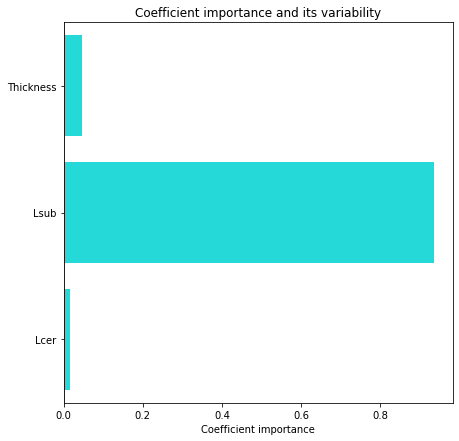

In [18]:
#Check features importance
fi = pd.DataFrame(model.feature_importances_, index = ['Thickness', 'Lsub', 'Lcer']).transpose()
print(fi.round(3))

#Plot Feature importance
plt.figure(figsize=(9, 7))
sns.barplot(data=fi, orient='h', color='cyan', saturation=0.7)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

In [19]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.round(fi, decimals =2)

,Thickness,Lsub,Lcer
0,0.05,0.94,0.02


[Text(0.5904017857142857, 0.95, 'Lsub <= 84.29\nsquared_error = 233.835\nsamples = 1536\nvalue = 68.001'),
 Text(0.28932005494505497, 0.85, 'Lsub <= 43.186\nsquared_error = 113.975\nsamples = 1147\nvalue = 61.032'),
 Text(0.10989010989010989, 0.75, 'Thickness <= 0.6\nsquared_error = 48.646\nsamples = 376\nvalue = 47.194'),
 Text(0.054945054945054944, 0.65, 'Thickness <= 0.4\nsquared_error = 14.875\nsamples = 190\nvalue = 41.726'),
 Text(0.03296703296703297, 0.55, 'Lcer <= 67.85\nsquared_error = 6.061\nsamples = 96\nvalue = 38.746'),
 Text(0.02197802197802198, 0.45, 'Lcer <= 63.007\nsquared_error = 0.924\nsamples = 74\nvalue = 37.496'),
 Text(0.01098901098901099, 0.35, 'squared_error = 1.112\nsamples = 28\nvalue = 37.093'),
 Text(0.03296703296703297, 0.35, 'bcer <= 10.832\nsquared_error = 0.65\nsamples = 46\nvalue = 37.742'),
 Text(0.02197802197802198, 0.25, 'squared_error = 0.722\nsamples = 23\nvalue = 37.953'),
 Text(0.04395604395604396, 0.25, 'squared_error = 0.488\nsamples = 23\nval

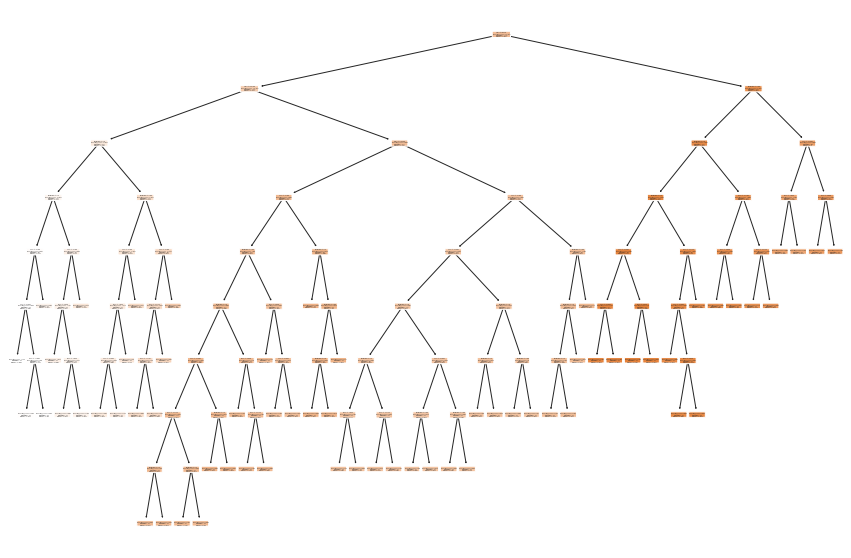

In [209]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer'], 
          filled=True, impurity=True, 
          rounded=True)

In [210]:
fig.savefig('../images/decisiontreeL.pdf', figsize=(150, 100))

In [20]:
pred = pd.DataFrame(model.predict(X_test), columns=['Lpred'])

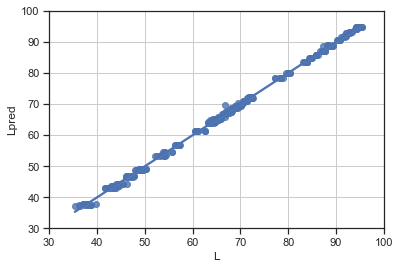

In [21]:
sns.set(style="ticks")
sns.regplot(y_test, pred[['Lpred']])
#control x and y limits
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.grid()
 
plt.show()

In [22]:
predL = pred.to_numpy()
yL = y_test.reset_index()
yL = yL.drop(columns='index').to_numpy()
APE = pd.DataFrame(100*(abs(yL - predL)/yL), columns=[['APE']])
APE.mean()

APE   0.69
dtype: float64

# Predict Univariate feature a*

In [224]:
all_regs_drop = pd.Series(all_regs)
all_regs_drop = all_regs_drop.drop(index = [11, 16, 29, 30, 31, 32, 39])
all_regs_drop

0                                       ARDRegression()
1     (DecisionTreeRegressor(max_depth=3, random_sta...
2     (DecisionTreeRegressor(random_state=2110884507...
3                                       BayesianRidge()
4                                                 CCA()
5                               DecisionTreeRegressor()
6                                      DummyRegressor()
7                                          ElasticNet()
8                                        ElasticNetCV()
9                                  ExtraTreeRegressor()
10    (ExtraTreeRegressor(random_state=1738789586), ...
12                           GaussianProcessRegressor()
13    ([DecisionTreeRegressor(criterion='friedman_ms...
14                      HistGradientBoostingRegressor()
15                                     HuberRegressor()
17                                KNeighborsRegressor()
18                                        KernelRidge()
19                                              

In [229]:
###Predict a
X, y = df[['Thickness','Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']], df['a']


#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Defining Regressors

regressors = all_regs_drop

#Testing Models
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", np.round(explained_variance_score(y_test, y_pred), decimals=3))
    print("\tMean absolute error:", np.round(mean_absolute_error(y_test, y_pred), decimals =3))
    print("\tR2 score:", np.round(r2_score(y_test, y_pred), decimals = 3))
    print()

ARDRegression()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.815
	Mean absolute error: 0.345
	R2 score: 0.814

AdaBoostRegressor()
	Training time: 0.064s
	Prediction time: 0.004s
	Explained variance: 0.941
	Mean absolute error: 0.221
	R2 score: 0.94

BaggingRegressor()
	Training time: 0.026s
	Prediction time: 0.003s
	Explained variance: 0.997
	Mean absolute error: 0.045
	R2 score: 0.997

BayesianRidge()
	Training time: 0.005s
	Prediction time: 0.001s
	Explained variance: 0.815
	Mean absolute error: 0.344
	R2 score: 0.814

CCA()
	Training time: 0.005s
	Prediction time: 0.001s
	Explained variance: 0.477
	Mean absolute error: 0.676
	R2 score: 0.477

DecisionTreeRegressor()
	Training time: 0.003s
	Prediction time: 0.001s
	Explained variance: 0.997
	Mean absolute error: 0.045
	R2 score: 0.997

DummyRegressor()
	Training time: 0.000s
	Prediction time: 0.000s
	Explained variance: 0.0
	Mean absolute error: 0.961
	R2 score: -0.0

ElasticNet()
	Training time: 0.002s
	Pr

In [226]:
df_temp = pd.DataFrame({'Model': [],
        'Train Time': [],
        'Prediction time' : [],
        'Explained variance':[], 
        'Mean absolute error':[],
        'R2 score':[]})

for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    
    new_row = pd.DataFrame({'Model': str(model),
                            'Train Time': train_time,
                            'Prediction time' : predict_time,
                            'Explained variance': explained_variance_score(y_test, y_pred),
                            'Mean absolute error': mean_absolute_error(y_test, y_pred),
                            'R2 score':r2_score(y_test, y_pred)}, index = [0])
    
    df_temp = pd.concat((df_temp, new_row))
    df_models = np.round(pd.DataFrame(df_temp), decimals = 3)

In [228]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_models.sort_values(['Mean absolute error','R2 score', 'Train Time']).head(10)

,Model,Train Time,Prediction time,Explained variance,Mean absolute error,R2 score
0,BaggingRegressor(),0.019,0.002,0.997,0.044,0.997
0,DecisionTreeRegressor(),0.001,0.001,0.997,0.045,0.997
0,ExtraTreeRegressor(),0.001,0.001,0.997,0.045,0.997
0,GaussianProcessRegressor(),0.094,0.021,0.997,0.045,0.997
0,ExtraTreesRegressor(),0.095,0.010,0.997,0.045,0.997
0,RandomForestRegressor(),0.151,0.012,0.997,0.045,0.997
0,HistGradientBoostingRegressor(),0.639,0.003,0.997,0.045,0.997
0,KNeighborsRegressor(),0.002,0.004,0.997,0.048,0.997
0,GradientBoostingRegressor(),0.052,0.002,0.996,0.057,0.996
0,MLPRegressor(),0.701,0.001,0.960,0.177,0.960


In [230]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9972282995215628
model score on testing data: 0.9973224310718549


In [231]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

num_of_features = []
pipe = model

for i in range (1, 7):
    sfs = SFS(pipe,
         n_features_to_select= i,
         direction='forward',
         scoring='r2',
         n_jobs=3,
         cv=5)
    sfs.fit(X_train, y_train)
    features = sfs.get_support(indices=True)
    X.iloc[:, features]
    
    r2_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="r2", cv=5)
    mean_r2_train = np.mean(r2_train)
    
    r2_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="r2", cv=5)
    mean_r2_test = np.mean(r2_test)
    
    mse_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_squared_error", cv=5)
    mean_mse_train = np.mean(mse_train)
    
    mse_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_squared_error", cv=5)
    mean_mse_test = np.mean(mse_test)
    
    mae_train = cross_val_score(pipe, X_train.iloc[:, features], y_train, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_train = np.mean(mae_train)
    
    mae_test = cross_val_score(pipe, X_test.iloc[:, features], y_test, scoring="neg_mean_absolute_error", cv=5)
    mean_mae_test = np.mean(mae_test)
    
    d = {'n_features': i, 'R2_train': mean_r2_train, 'R2_test': mean_r2_test, 'MSE_train': mean_mse_train, 
         'MSE_test': mean_mse_test, 'MAE_train': mean_mae_train, 'MAE_test': mean_mae_test} 
    num_of_features.append(d)

In [232]:
n_features_data = pd.DataFrame(num_of_features)
n_features_data

,n_features,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
0,1,0.725,0.740,-0.354,-0.372,-0.408,-0.403
1,2,0.874,0.880,-0.161,-0.169,-0.290,-0.292
2,3,0.997,0.996,-0.004,-0.005,-0.046,-0.051
3,4,0.997,0.996,-0.004,-0.005,-0.046,-0.051
4,5,0.997,0.996,-0.004,-0.005,-0.046,-0.051
5,6,0.997,0.996,-0.004,-0.005,-0.046,-0.051


In [233]:
from time import time

dt = DecisionTreeRegressor()
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': list(range(1,30)),
    'min_samples_leaf': list(range(1,100)),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "neg_mean_squared_error")

In [234]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 11484 candidates, totalling 114840 fits
CPU times: user 56.4 s, sys: 2.91 s, total: 59.3 s
Wall time: 2min 42s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='neg_mean_squared_error', verbose=1)

In [235]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4660,0.004,0.001,0.002,0.000,friedman_mse,19,8,"{'criterion': 'friedman_mse', 'max_depth': 19,...",-0.003,-0.005,...,-0.004,-0.004,-0.003,-0.004,-0.003,-0.005,-0.003,-0.004,0.001,1
4072,0.003,0.000,0.002,0.001,friedman_mse,13,14,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-0.003,-0.005,...,-0.004,-0.004,-0.003,-0.004,-0.003,-0.005,-0.003,-0.004,0.001,1
4460,0.003,0.001,0.002,0.001,friedman_mse,17,6,"{'criterion': 'friedman_mse', 'max_depth': 17,...",-0.003,-0.005,...,-0.004,-0.004,-0.003,-0.004,-0.003,-0.005,-0.003,-0.004,0.001,3
1491,0.005,0.001,0.004,0.002,squared_error,16,7,"{'criterion': 'squared_error', 'max_depth': 16...",-0.003,-0.005,...,-0.004,-0.004,-0.003,-0.004,-0.003,-0.005,-0.003,-0.004,0.001,3
5249,0.003,0.000,0.002,0.000,friedman_mse,25,3,"{'criterion': 'friedman_mse', 'max_depth': 25,...",-0.003,-0.005,...,-0.004,-0.004,-0.003,-0.004,-0.003,-0.005,-0.003,-0.004,0.001,3


In [236]:
best = grid_search.best_params_
best

{'criterion': 'friedman_mse', 'max_depth': 13, 'min_samples_leaf': 14}

In [237]:
model = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 13, min_samples_leaf = 14)

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9972282995215628
model score on testing data: 0.9973224310718549


   Thickness  Lsub  asub  bsub  Lcer  acer  bcer
0      0.101 0.081 0.728 0.006 0.070 0.007 0.007


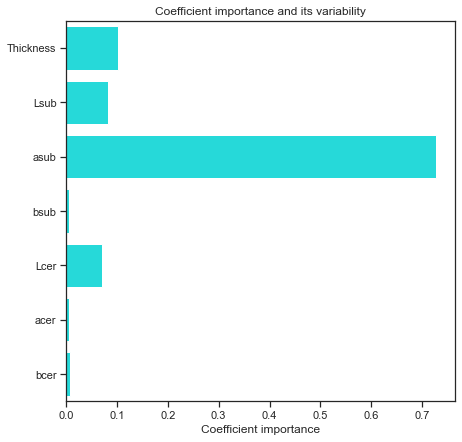

In [238]:
#Check features importance
fi = pd.DataFrame(model.feature_importances_, index = ['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer']).transpose()
print(fi.round(3))

#Plot Feature importance
plt.figure(figsize=(9, 7))
sns.barplot(data=fi, orient='h', color='cyan', saturation=0.7)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

[Text(0.6714616402116402, 0.9444444444444444, 'asub <= 5.471\nfriedman_mse = 1.28\nsamples = 1536\nvalue = 0.693'),
 Text(0.4580026455026455, 0.8333333333333334, 'Lcer <= 64.357\nfriedman_mse = 0.499\nsamples = 1160\nvalue = 1.229'),
 Text(0.2552910052910053, 0.7222222222222222, 'Thickness <= 0.95\nfriedman_mse = 0.522\nsamples = 585\nvalue = 1.565'),
 Text(0.1349206349206349, 0.6111111111111112, 'Lsub <= 67.8\nfriedman_mse = 0.262\nsamples = 439\nvalue = 1.338'),
 Text(0.05291005291005291, 0.5, 'bcer <= 14.119\nfriedman_mse = 0.007\nsamples = 139\nvalue = 1.841'),
 Text(0.031746031746031744, 0.3888888888888889, 'Thickness <= 0.6\nfriedman_mse = 0.008\nsamples = 69\nvalue = 1.812'),
 Text(0.021164021164021163, 0.2777777777777778, 'Thickness <= 0.4\nfriedman_mse = 0.002\nsamples = 48\nvalue = 1.853'),
 Text(0.010582010582010581, 0.16666666666666666, 'friedman_mse = 0.001\nsamples = 23\nvalue = 1.863'),
 Text(0.031746031746031744, 0.16666666666666666, 'friedman_mse = 0.004\nsamples = 25\

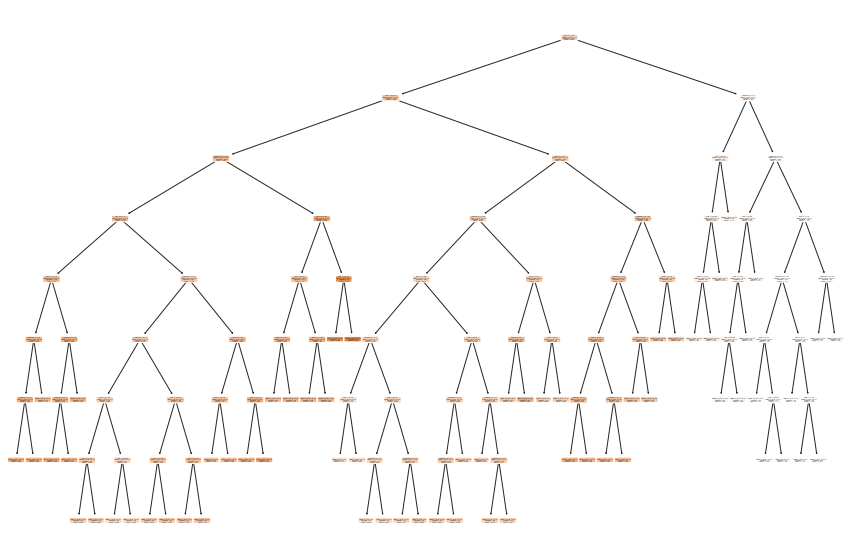

In [239]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=['Thickness', 'Lsub', 'asub','bsub', 'Lcer', 'acer', 'bcer'], 
          filled=True, impurity=True, 
          rounded=True)

In [245]:
fig.savefig('../images/decisiontreea.jpg', figsize=(150, 100))

In [241]:
pred = pd.DataFrame(model.predict(X_test), columns=['apred'])

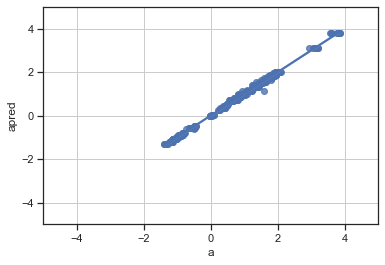

In [244]:
sns.set(style="ticks")
sns.regplot(y_test, pred[['apred']])
#control x and y limits
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.grid()
 
plt.show()

# Predict Univariate feature b*

In [329]:
import gradio as gr

def greet(Thickness, Lsub, asub, bsub, Lcer, acer, bcer):
    list1 = [Thickness, Lsub, Lcer]
    df1 = pd.DataFrame(list).T
    Lf = model.predict(df1)
    return Lf

demo = gr.Interface(fn=greet, inputs=[gr.Slider(0, 5, 0.1),
                                      gr.Slider(0, 100, 1),
                                      gr.Slider(-10, 10, 0.2),
                                      gr.Slider(-20, 20, 0.2),
                                      gr.Slider(0, 100, 1),
                                      gr.Slider(-10, 10, 0.2),
                                      gr.Slider(-20, 20, 0.2)], outputs=["number"])
demo.launch()

Running on local URL:  http://127.0.0.1:7890

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f89b83d9dc0>, 'http://127.0.0.1:7890/', None)

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/gradio/routes.py", line 268, in run_predict
    output = await app.blocks.process_api(
  File "/opt/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 748, in process_api
    result = await self.call_function(fn_index, inputs, iterator)
  File "/opt/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 627, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/opt/anaconda3/lib/python3.9/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/opt/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/opt/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "/var/folders/rr/ffp1c_lx2xvc_cg2t0j67274000